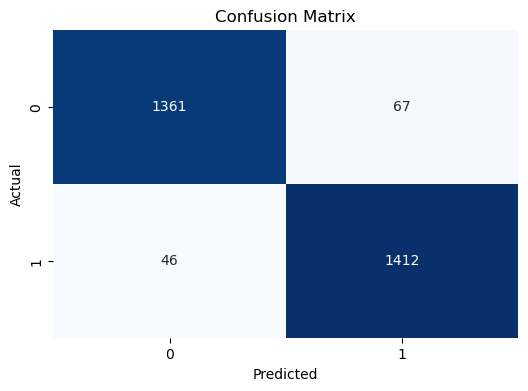

Accuracy: 0.9608
Precision: 0.9609
Recall: 0.9608
F1 Score: 0.9608


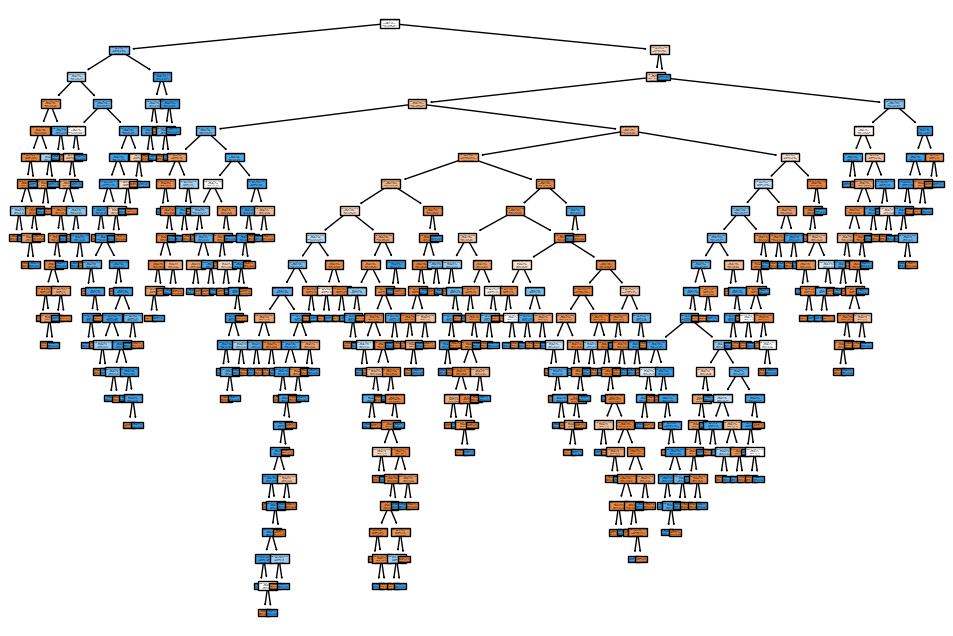

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('eeg_features.csv')

# Drop 'Subject' column if it exists
if 'Subject' in df.columns:
    df = df.drop(columns=['Subject'])

# Split features and target variable
X = df.drop(columns=['State'])  # All columns except 'State'
y = df['State']  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True)
plt.show()


Accuracy: 0.9962
Precision: 0.9962
Recall: 0.9962
F1 Score: 0.9962


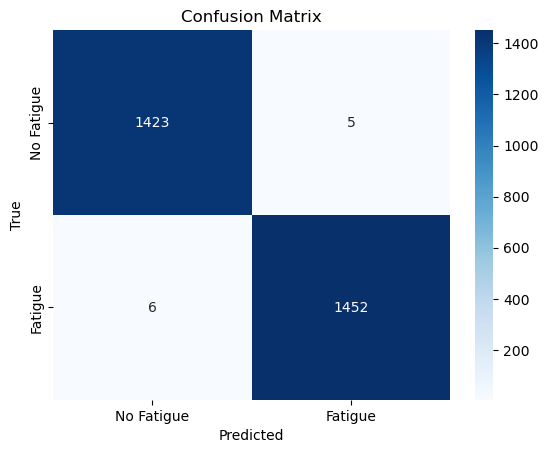

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('eeg_features.csv')

# Separate features and target variable
X = df.drop(columns=['State'])  # All columns except 'State'
y = df['State']  # Target variable 'State'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')  # Use 'binary' if the target is binary
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fatigue', 'Fatigue'], yticklabels=['No Fatigue', 'Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Best k: 2
Accuracy: 0.9910
Precision: 0.9910
Recall: 0.9910
F1 Score: 0.9910


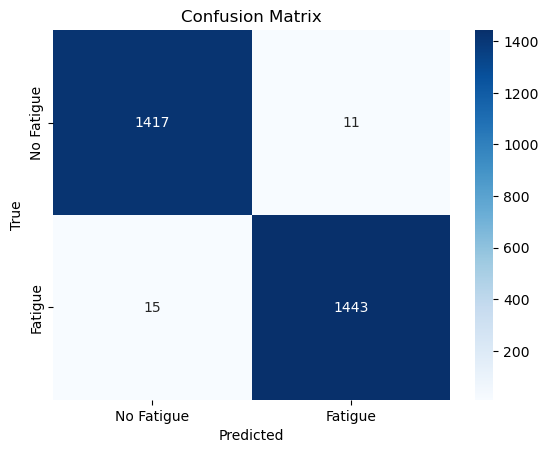

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('eeg_features.csv')

# Separate features and target variable
X = df.drop(columns=['State'])  # All columns except 'State'
y = df['State']  # Target variable 'State'

# Impute missing values in the feature data using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k
param_grid = {'n_neighbors': range(1, 21)}  # Test k values from 1 to 20
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Train the k-NN model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_best.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' if the target is binary
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fatigue', 'Fatigue'], yticklabels=['No Fatigue', 'Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Best parameters: {'C': 100, 'kernel': 'rbf'}
Accuracy: 0.9951
Precision: 0.9952
Recall: 0.9951
F1 Score: 0.9951


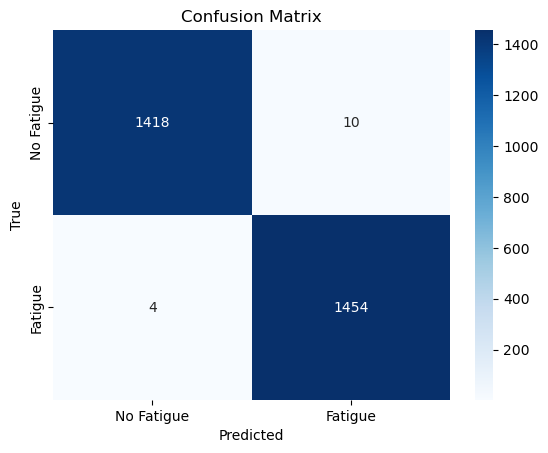

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('eeg_features.csv')

# Separate features and target variable
X = df.drop(columns=['State'])  # All columns except 'State'
y = df['State']  # Target variable 'State'

# Impute missing values in the feature data using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) classifier
svm = SVC(random_state=42)

# Set up a parameter grid for GridSearchCV to find the best C and kernel
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Different kernels
}

# Perform GridSearchCV to find the best combination of hyperparameters (C and kernel)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters (C and kernel)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the SVM model with the best hyperparameters
svm_best = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
svm_best.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_best.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' if the target is binary
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fatigue', 'Fatigue'], yticklabels=['No Fatigue', 'Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
